In [1]:
%matplotlib notebook 

In [2]:
# converted to python from mathematica sample
# using chatgpt and many manual changes 12/17/2022
# this version has many new changes by me
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [10, 100]
def weighted_coin_toss_2(pay_out_odds, chance_of_winning):
    if random.random() > 1 - chance_of_winning:
        return pay_out_odds - 1
    else:
        return -1
    
def RunGame2(wlt, OriginalAmountOfMoney, BettingStyle, 
             ChanceOfWinning, FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, ConstantBet):
    Monies = [OriginalAmountOfMoney, OriginalAmountOfMoney]
    for i in range(len(wlt)):
        newMonies = Monies[-1] + wlt[i] * Bet2(Monies, BettingStyle, ChanceOfWinning, FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, ConstantBet)
        #print(newMonies)
        Monies.append(newMonies)
    return Monies

def Bet2(winnings_history, style, chance_of_winning, fraction_betting, can_go_into_debt, betting_limit, max_bet, pay_out_odds, constant_bet):
    current_winnings = winnings_history[-1]
    kbet = 0 if pay_out_odds == 1 else ((pay_out_odds * chance_of_winning - 1) * current_winnings) / (pay_out_odds - 1)
  
    fbet = fraction_betting * current_winnings
    mbet = abs(winnings_history[-1] - winnings_history[-2])
    
    if style == "constant bet":
        if current_winnings >= constant_bet:
            return constant_bet
        elif can_go_into_debt:
            return constant_bet
        else:
            return 0
    elif style == "Kelly criterion":
        if kbet > 0:
            #print(f"chance of winning:{chance_of_winning}, currentwinnnings: {current_winnings},kbet {kbet},percentage of winnings {kbet/current_winnings}")    
            if betting_limit:
                
                return min(kbet, max_bet)
            else:
                
                return kbet
        else:
            return 0
    elif style == "constant fraction":
        if betting_limit:
            return min(fbet, max_bet)
        else:
            return fbet
    elif style == "martingale":
        if len(winnings_history) == 2:
            return 1
        elif winnings_history[-1] - winnings_history[-2] > 0:
            return mbet
        else:
            return min(2 * mbet, max_bet if betting_limit else float("inf"), float("inf") if can_go_into_debt else current_winnings)
    elif style == "anti-martingale":
        if len(winnings_history) == 2:
            return 1
        elif winnings_history[-1] - winnings_history[-2] > 0:
            return min(2 * mbet, max_bet if betting_limit else float("inf"), float("inf") if can_go_into_debt else current_winnings)
        else:
            return min(mbet / 2, max_bet if betting_limit else float("inf"), float("inf") if can_go_into_debt else current_winnings)
    else:
        return 1

def GetData2(ChanceOfWinning, NumGames, OriginalAmountOfMoney, FractionBetting, 
             CanGoIntoDebt, BettingLimit, MaxBet, seed, PayOutOdds, ConstantBet):
    wlt = []
    if seed:
        random.seed(seed)
    for _ in range(NumGames):
        if random.random() > 1 - ChanceOfWinning:
            wlt.append(PayOutOdds - 1)
        else:
            wlt.append(-1)
    y1 = RunGame2(wlt, OriginalAmountOfMoney, "constant bet", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, ConstantBet)
    y2 = RunGame2(wlt, OriginalAmountOfMoney, "Kelly criterion", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    #print("kbet",y2)
    y3 = RunGame2(wlt, OriginalAmountOfMoney, "constant fraction", ChanceOfWinning, FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    y4 = RunGame2(wlt, OriginalAmountOfMoney, "martingale", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    y5 = RunGame2(wlt, OriginalAmountOfMoney, "anti-martingale", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    return y1, y2, y3, y4, y5


def GetData2_orginal(ChanceOfWinning, NumGames, OriginalAmountOfMoney, FractionBetting, 
             CanGoIntoDebt, BettingLimit, MaxBet, seed, PayOutOdds, ConstantBet):
    wlt = []
    if seed:
        random.seed(seed)
    for _ in range(NumGames):
        if random.random() > 1 - ChanceOfWinning:
            wlt.append(PayOutOdds - 1)
        else:
            wlt.append(-1)
    y1 = RunGame2(wlt, OriginalAmountOfMoney, "constant bet", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, ConstantBet)
    y2 = RunGame2(wlt, OriginalAmountOfMoney, "Kelly criterion", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    #print("kbet",y2)
    y3 = RunGame2(wlt, OriginalAmountOfMoney, "constant fraction", ChanceOfWinning, FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    y4 = RunGame2(wlt, OriginalAmountOfMoney, "martingale", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    y5 = RunGame2(wlt, OriginalAmountOfMoney, "anti-martingale", ChanceOfWinning, .1, CanGoIntoDebt, BettingLimit, MaxBet, PayOutOdds, 0)
    return y1, y2, y3, y4, y5


In [3]:
import matplotlib.pyplot as plt

def Chart(ChanceOfWinning, NumGames, OriginalAmountOfMoney, 
          FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, 
          seed,
          PayOutOdds, ConstantBet):
    sum1, sum2, sum3, sum4, sum5 = 0, 0, 0, 0, 0
    #for _ in range(25): 
        # play 100 games, 25 times and return winning of each game
    data = GetData2(ChanceOfWinning, NumGames, OriginalAmountOfMoney, 
                    FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, 
                    seed,
                    PayOutOdds, ConstantBet)
    return data
    

def Chart_orginal(ChanceOfWinning, NumGames, OriginalAmountOfMoney, 
          FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, 
          seed,
          PayOutOdds, ConstantBet):
    sum1, sum2, sum3, sum4, sum5 = 0, 0, 0, 0, 0
    for _ in range(25):
        data = GetData2(ChanceOfWinning, NumGames, OriginalAmountOfMoney, 
                        FractionBetting, CanGoIntoDebt, BettingLimit, MaxBet, 
                        seed,
                        PayOutOdds, ConstantBet)
        
        sum1 += data[0][-1] 
        sum2 += data[1][-1] 
        sum3 += data[2][-1] 
        sum4 += data[3][-1] 
        sum5 += data[4][-1] 
    return sum1, sum2, sum3, sum4, sum5


def onelegend(color_text):
    color, text = color_text
    fig, ax = plt.subplots()
    ax.plot([], [], color=color, linewidth=10)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.legend([text])
    plt.show()

<IPython.core.display.Javascript object>


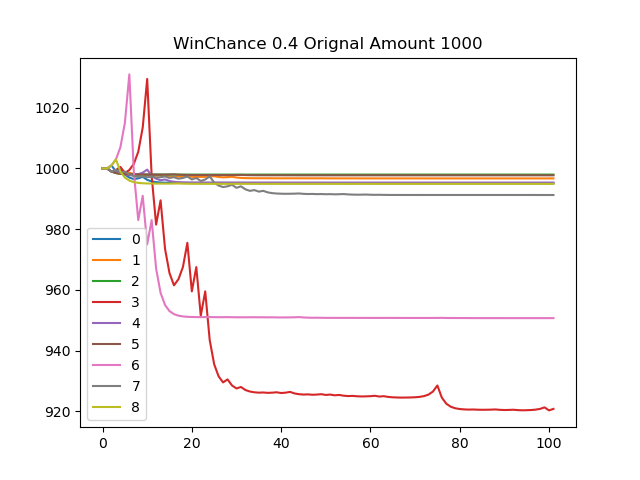

<IPython.core.display.Javascript object>


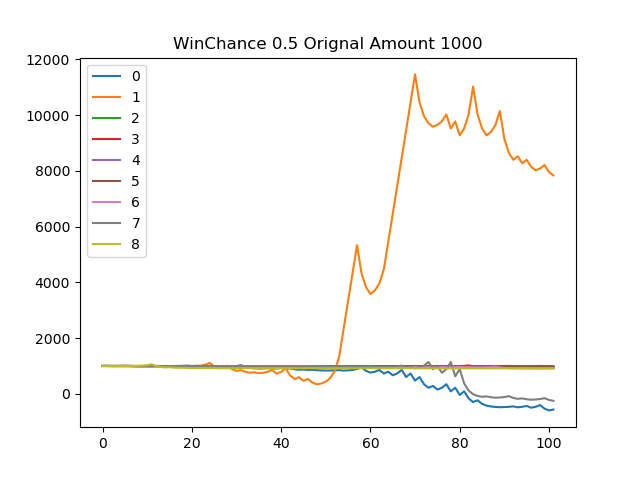

<IPython.core.display.Javascript object>


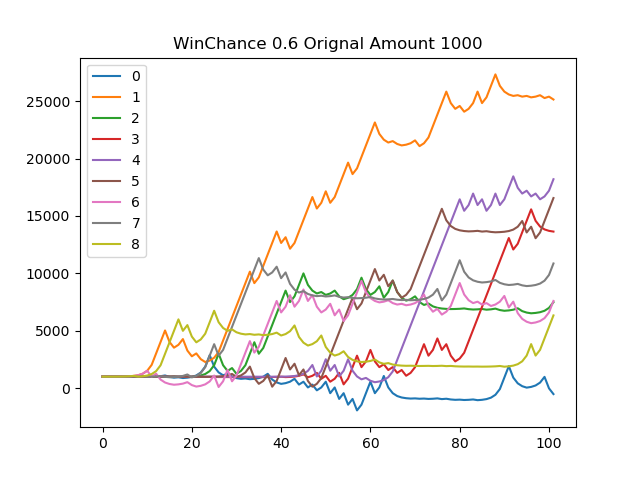

<IPython.core.display.Javascript object>


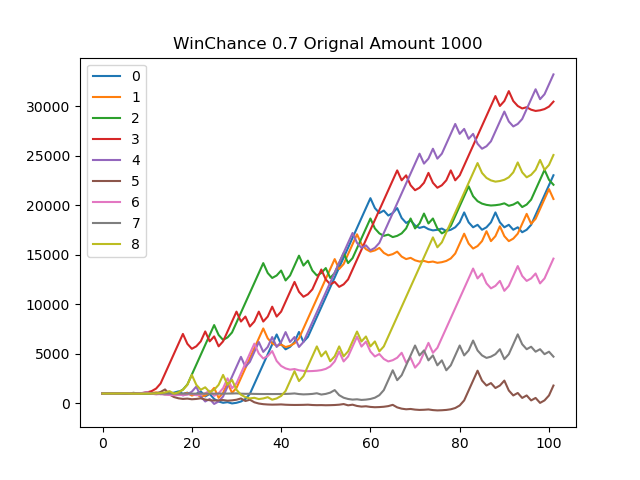

<IPython.core.display.Javascript object>


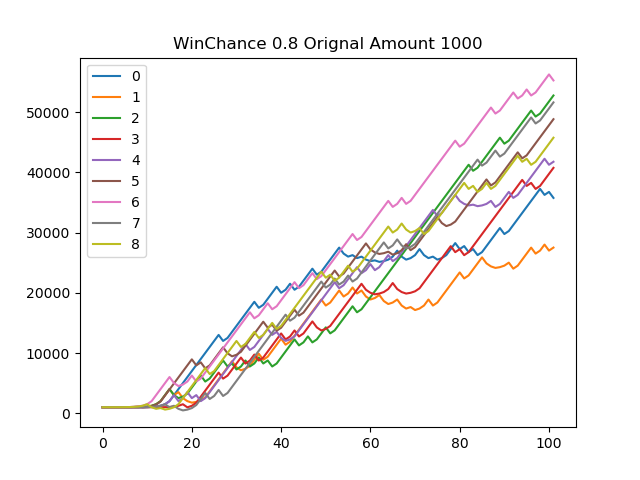

<IPython.core.display.Javascript object>


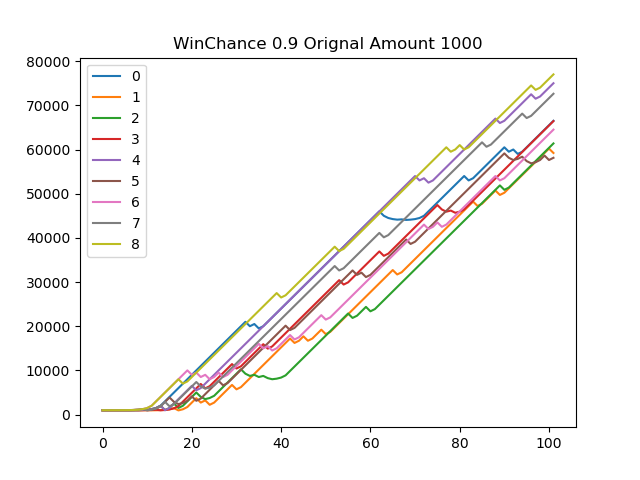

<IPython.core.display.Javascript object>


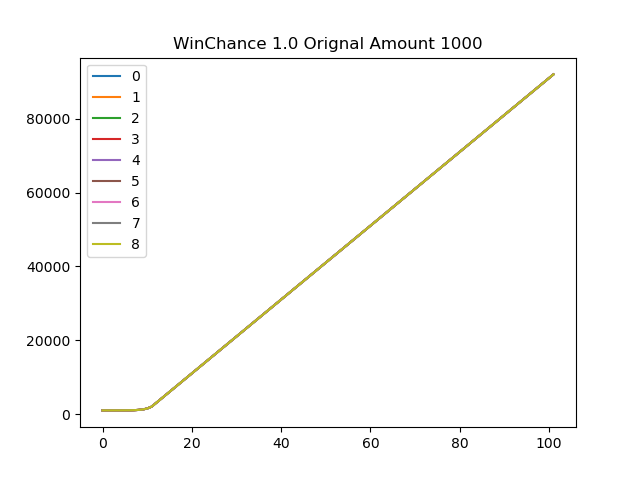

In [4]:
#fig = plt.figure(figsize=(1000,1500))
OriginalAmountOfMoney = 1000
for winChance in range(40,110,10):
    #df = pd.DataFrame(columns=["ContantBet", "Kelly", "ContantFraction","Martingale","AntiMartingale"])
    for i in range(10):
        values = Chart(ChanceOfWinning=winChance/100.0, 
                    NumGames=100, OriginalAmountOfMoney=OriginalAmountOfMoney, 
                    FractionBetting=0.02, 
                    CanGoIntoDebt=True, BettingLimit=10, MaxBet=OriginalAmountOfMoney, 
                    seed=None,
                    PayOutOdds=2, ConstantBet=10)
        values = np.transpose(np.array(values))
        if i == 0:
            all_values = values
        else:
            #print(values[:,1].reshape(-1))
            all_values = np.concatenate([all_values,values[:,-1:]], axis=1)
        #print(all_values.shape)
#df = pd.DataFrame(values, columns = ["ContantBet", "Kelly", "ContantFraction","Martingale","AntiMartingale"])
#df[["ContantBet", "Kelly", "ContantFraction"]].plot(title="WinChance {} Orignal {}".format(winChance/100,OriginalAmountOfMoney))
    df = pd.DataFrame(all_values[:,5:]) # keep kelly on ignore the first 5 columns
    df.plot(title="WinChance {} Orignal Amount {}".format(winChance/100,OriginalAmountOfMoney))

<IPython.core.display.Javascript object>


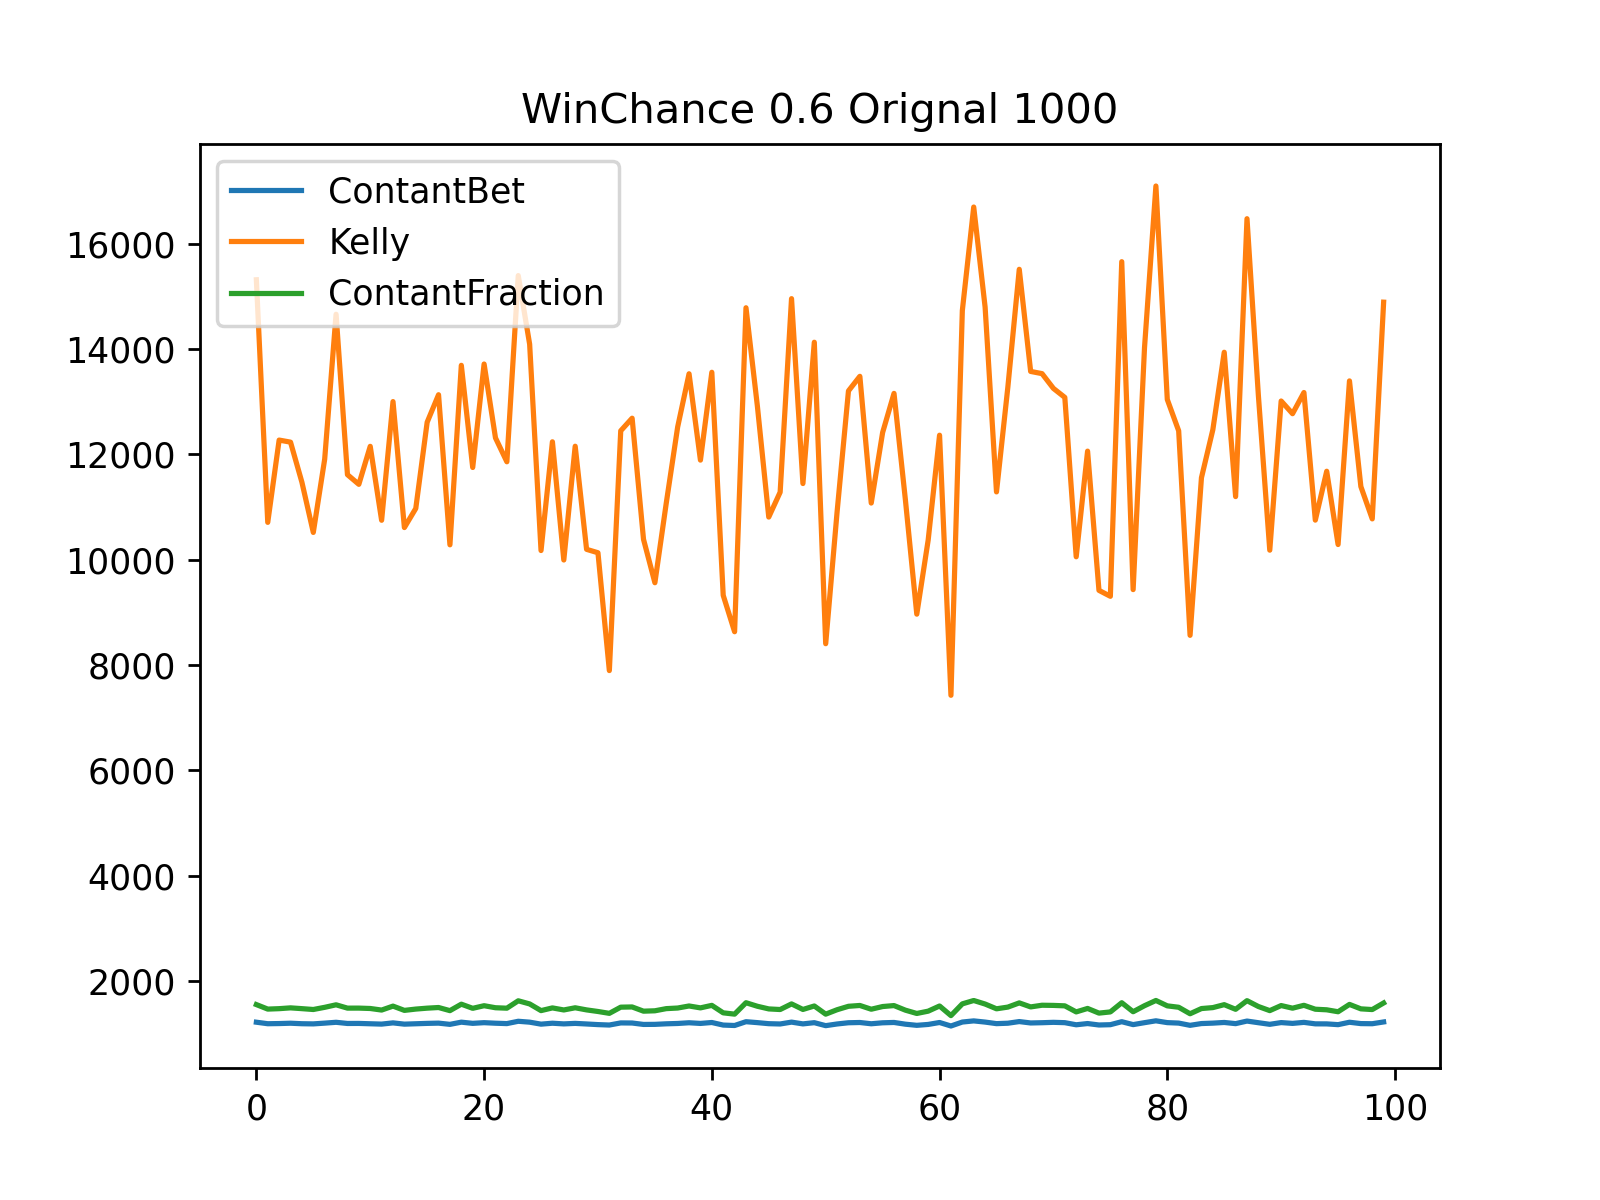

<IPython.core.display.Javascript object>


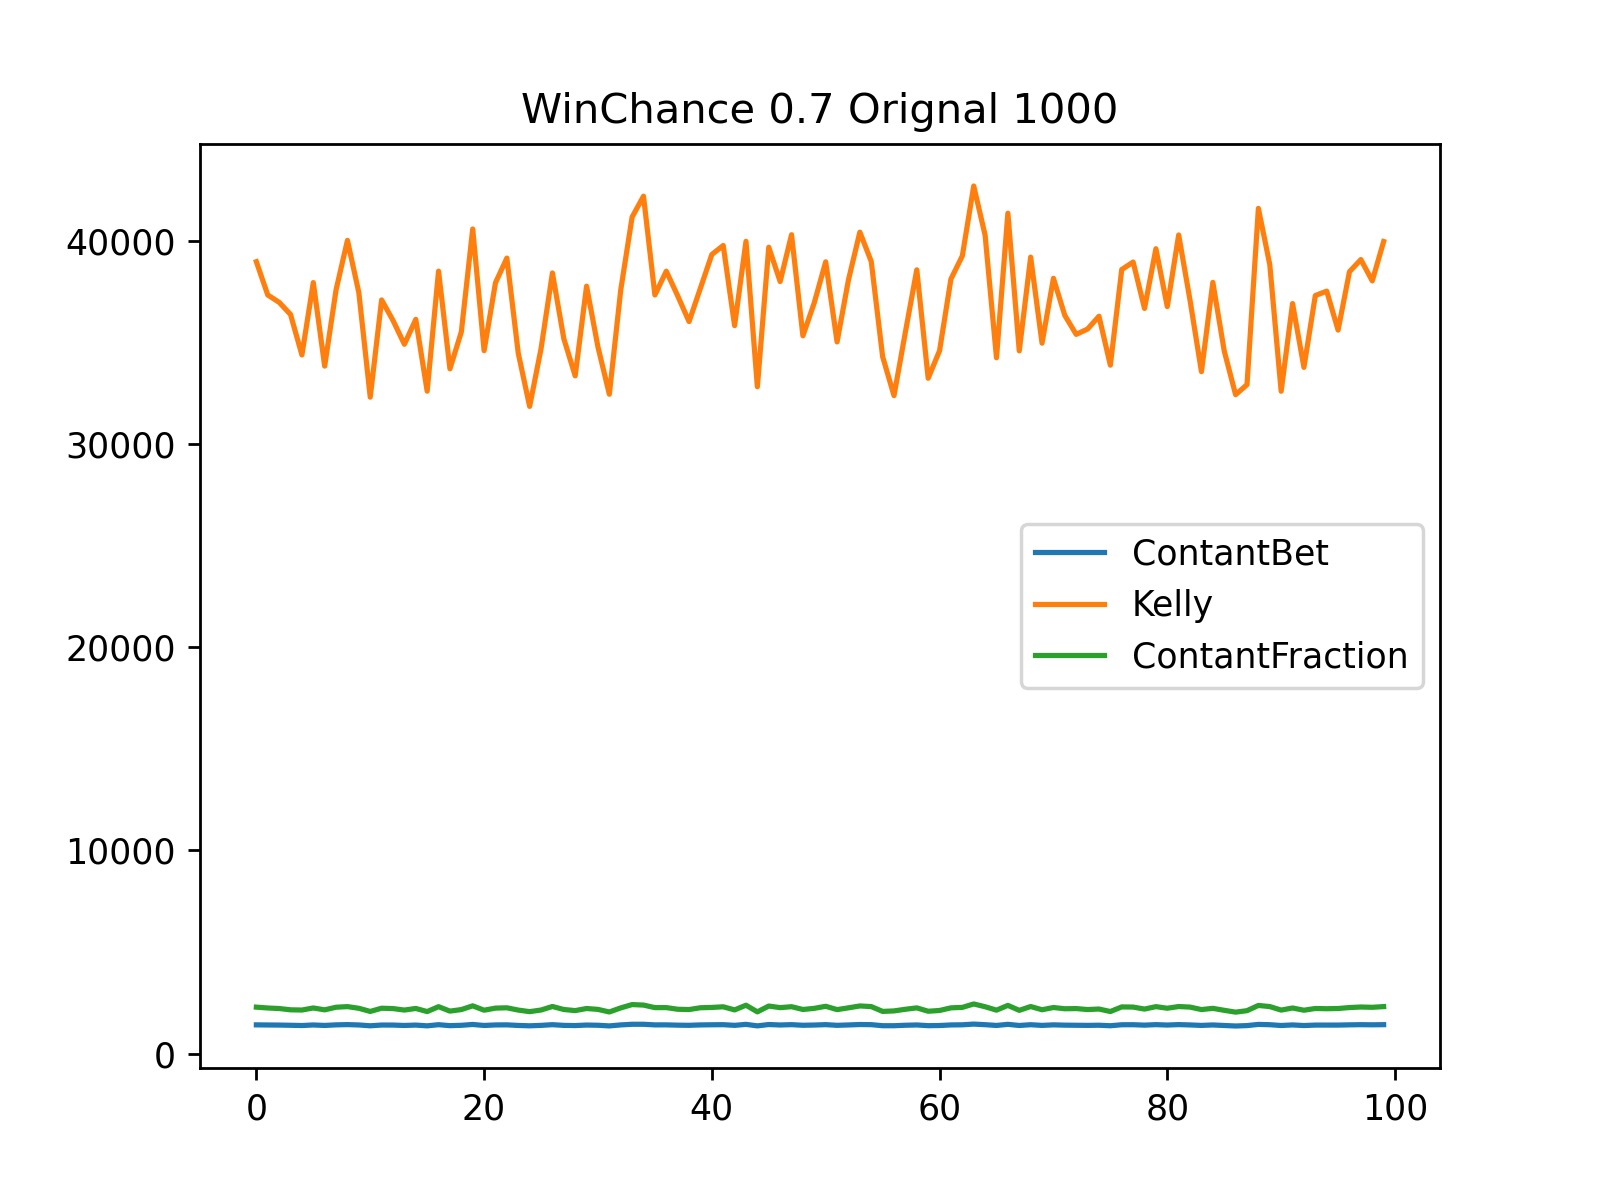

<IPython.core.display.Javascript object>


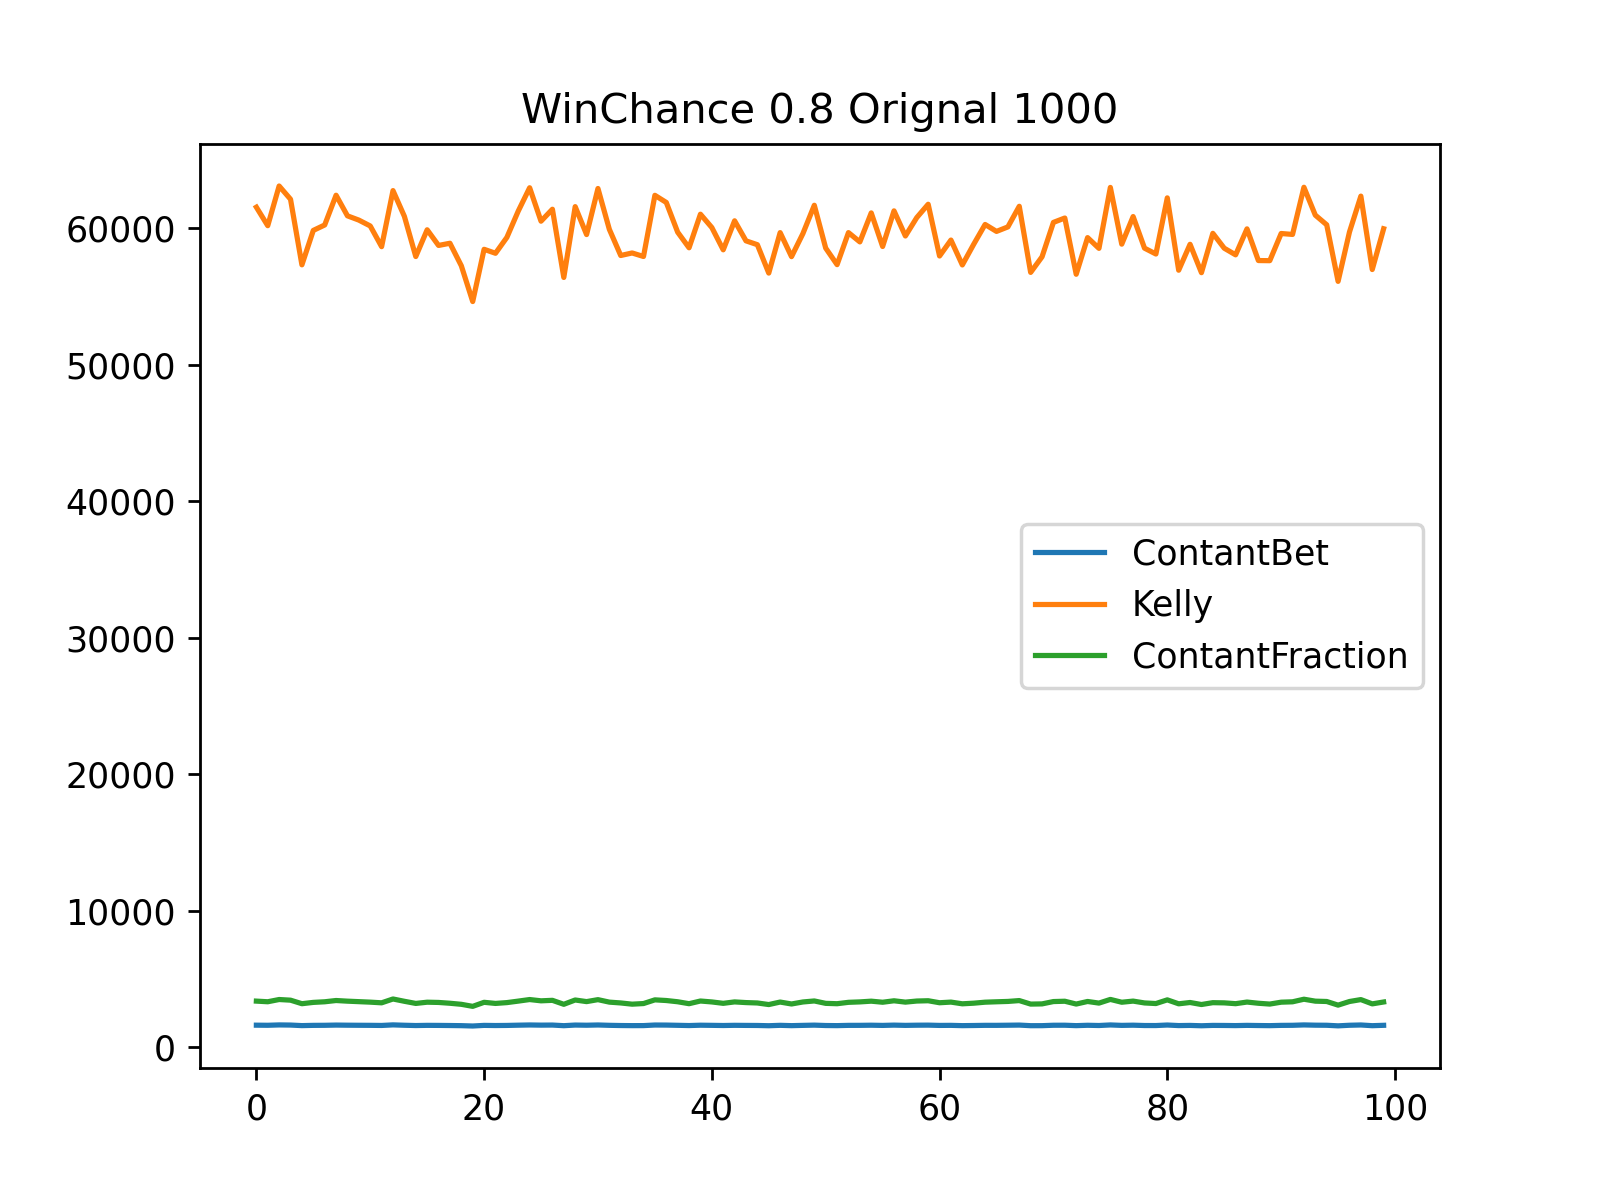

<IPython.core.display.Javascript object>


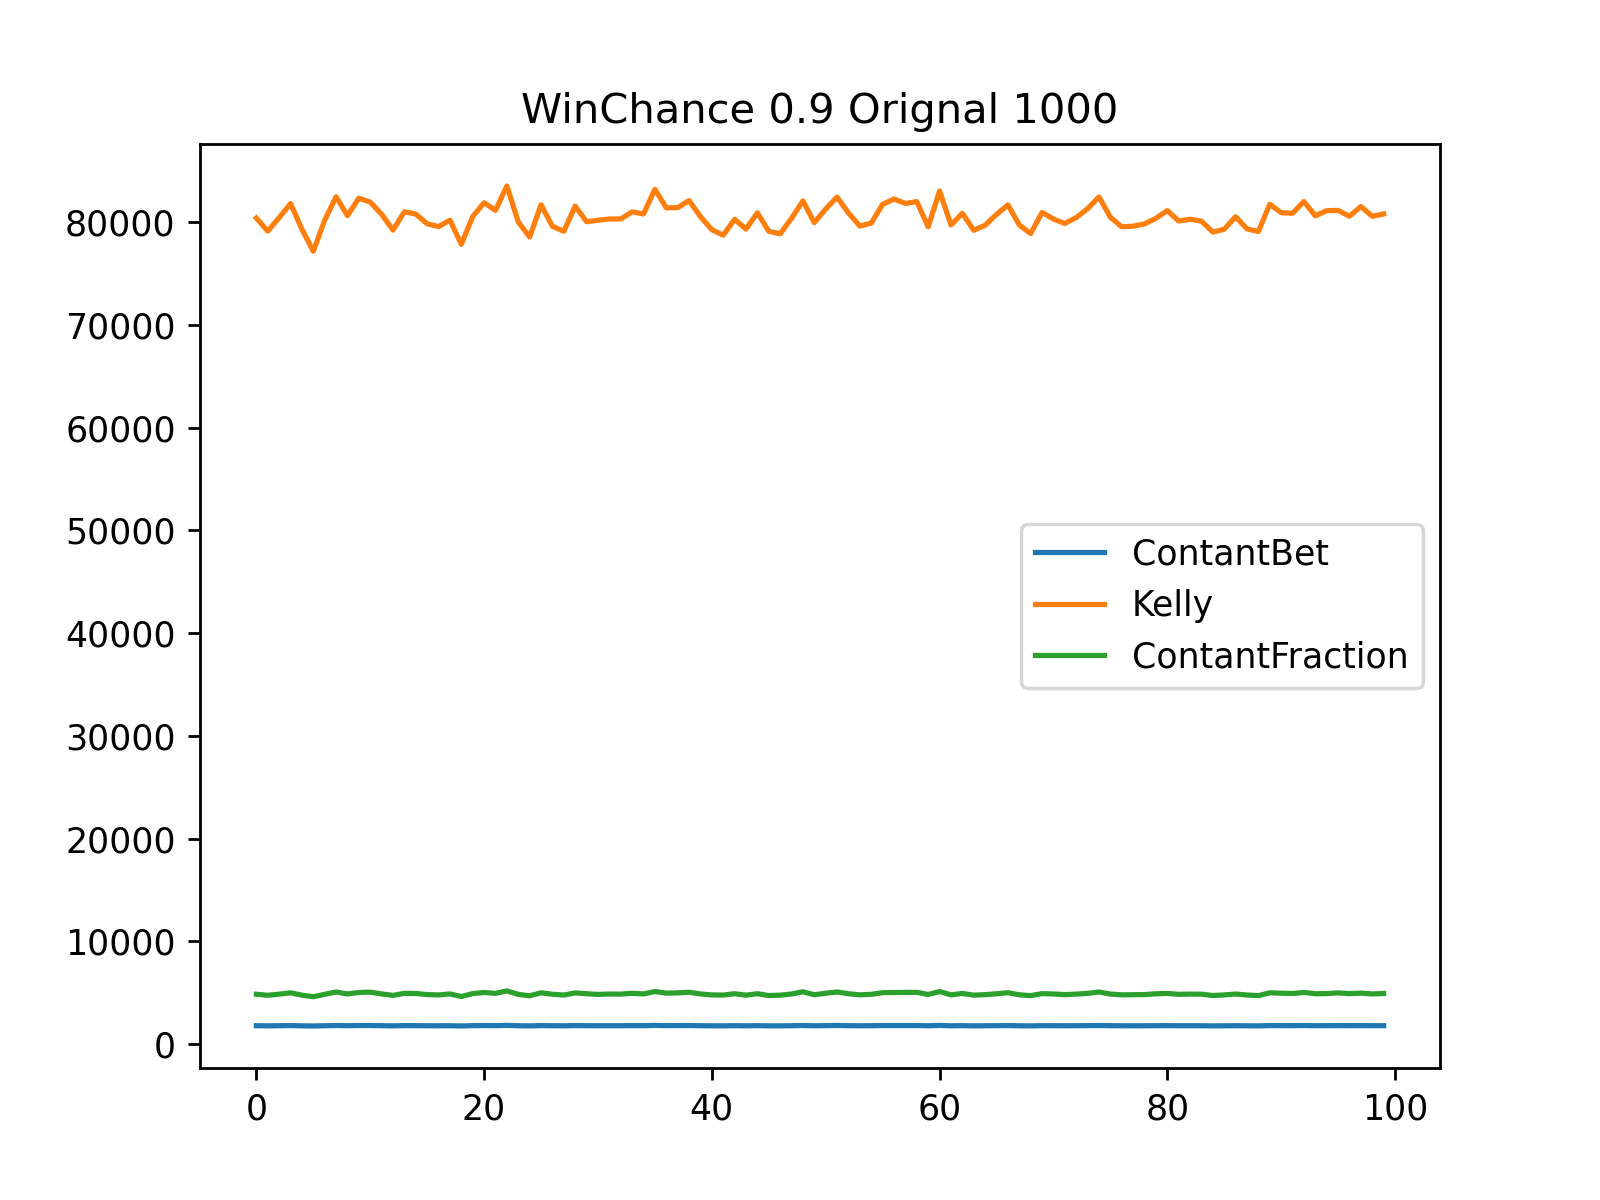

In [32]:
#fig = plt.figure(figsize=(1000,1500))
OriginalAmountOfMoney = 1000
for winChance in range(60,100,10):
    df = pd.DataFrame(columns=["ContantBet", "Kelly", "ContantFraction","Martingale","AntiMartingale"])
    for i in range(100):
        values = Chart_orginal(ChanceOfWinning=winChance/100.0, NumGames=100, OriginalAmountOfMoney=OriginalAmountOfMoney, 
              FractionBetting=0.02, CanGoIntoDebt=True, BettingLimit=10, MaxBet=OriginalAmountOfMoney, 
              seed=None,
              PayOutOdds=2, ConstantBet=10)
        
        avg_values = tuple(item / 25 for item in values)
        df.loc[i] = avg_values
    df[["ContantBet", "Kelly", "ContantFraction"]].plot(title="WinChance {} Orignal {}".format(winChance/100,OriginalAmountOfMoney))


In [ ]:
df.head()

In [ ]:
df.plot()